In [11]:
# !pip install missingno
# !pip install pycaret

In [12]:
import pycaret
import missingno as msno

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

import os
import pandas as pd
import numpy as np
import seaborn as sns

plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["font.size"]=12
plt.rcParams["figure.figsize"]=(14,4)
mpl.rcParams["axes.unicode_minus"]=False

import time
import statsmodels.api as sm

In [14]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [15]:
df=pd.read_csv('datafile.csv',encoding='ANSI')

# EDA

In [16]:
df.head()

,기종,호기,년도,분기,계획,긴급,비계획,자체,공군,외주,정비대금,불가동일수,VIP,계기비행(교육),계기비행(야간),수색(주간),시험비행,주간비행,해상경비,계기비행(주간),구명벌투하,구조(주간),기타,불법조업단속,비상절차(훈련),수색(야간),야간비행,야간비행(교육),오염군탐색,오염적발,정비(행정이동),조명탄투하,타기관지원,합동훈련,해상안전
0,CL-604,B701,2017,1,2,0,1,2,0,1,13510733.33,10,0,455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4385,0
1,CL-604,B701,2017,2,0,0,4,1,0,3,61510166.67,1,0,505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4135,0
2,CL-604,B701,2017,3,2,0,0,1,0,0,29126400.00,1,135,330,0,0,0,0,0,0,0,0,923,0,0,0,0,0,0,0,0,0,0,3020,0
3,CL-604,B701,2017,4,2,0,1,1,0,1,56328000.00,7,175,60,0,0,0,0,0,0,0,0,1640,0,0,0,0,0,0,0,0,0,0,4613,0
4,CL-604,B701,2018,1,2,0,1,2,0,1,33380600.00,0,0,913,0,0,0,0,0,0,0,0,2798,0,0,0,0,0,0,0,0,0,0,5283,0


In [17]:
df.describe()

,년도,분기,계획,긴급,비계획,자체,공군,외주,정비대금,불가동일수,VIP,계기비행(교육),계기비행(야간),수색(주간),시험비행,주간비행,해상경비,계기비행(주간),구명벌투하,구조(주간),기타,불법조업단속,비상절차(훈련),수색(야간),야간비행,야간비행(교육),오염군탐색,오염적발,정비(행정이동),조명탄투하,타기관지원,합동훈련,해상안전
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.00000,60.000000,60.0,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2018.000000,2.500000,1.766667,0.166667,0.983333,1.683333,0.316667,0.883333,1.656779e+08,15.833333,37.116667,418.650000,4.300000,378.233333,25.766667,0.0,3973.983333,2.166667,2.000000,4.583333,122.500000,115.716667,1.250000,42.950000,0.0,1.20000,4.333333,0.0,86.200000,170.716667,6.166667,894.116667,49.016667
std,0.823387,1.127469,1.280448,0.526152,1.396019,1.599700,0.567231,1.059128,3.360198e+08,27.763021,187.533870,586.617157,33.307657,585.542349,82.679772,0.0,2668.307478,16.782928,15.491933,35.502347,441.068253,349.003137,9.682458,212.825896,0.0,9.29516,33.565856,0.0,114.163695,469.817314,47.766795,1926.147381,123.855642
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.750000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.050125e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1740.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,2.500000,2.000000,0.000000,1.000000,1.000000,0.000000,0.500000,3.357005e+07,9.500000,0.000000,193.500000,0.000000,10.000000,0.000000,0.0,4388.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,3.250000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.473668e+08,17.250000,0.000000,513.750000,0.000000,603.750000,0.000000,0.0,5842.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,176.250000,0.000000,0.000000,47.500000,0.000000
max,2019.000000,4.000000,5.000000,3.000000,7.000000,6.000000,2.000000,3.000000,1.784421e+09,159.000000,1430.000000,2430.000000,258.000000,2435.000000,516.000000,0.0,10457.000000,130.000000,120.000000,275.000000,2798.000000,2394.000000,75.000000,1215.000000,0.0,72.00000,260.000000,0.0,492.000000,2666.000000,370.000000,7001.000000,655.000000


In [18]:
df.columns

Index(['기종', '호기', '년도', '분기', '계획', '긴급', '비계획', '자체', '공군', '외주', '정비대금',
       '불가동일수', 'VIP', '계기비행(교육)', '계기비행(야간)', '수색(주간)', '시험비행', '주간비행',
       '해상경비', '계기비행(주간)', '구명벌투하', '구조(주간)', '기타', '불법조업단속', '비상절차(훈련)',
       '수색(야간)', '야간비행', '야간비행(교육)', '오염군탐색', '오염적발', '정비(행정이동)', '조명탄투하',
       '타기관지원', '합동훈련', '해상안전'],
      dtype='object')

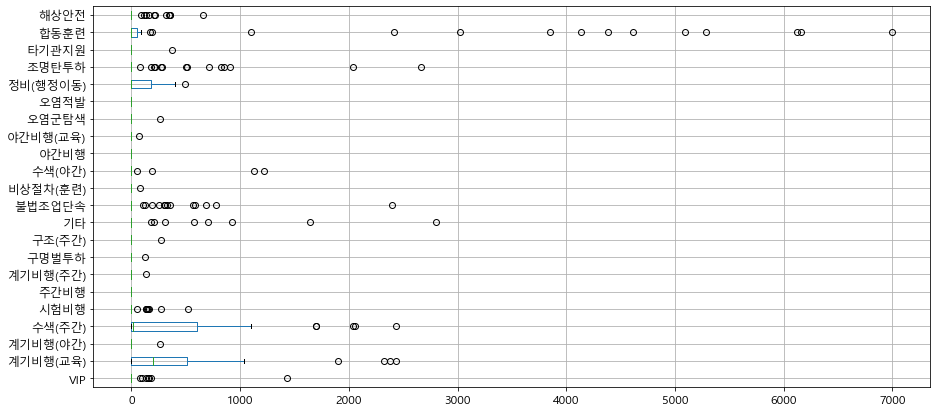

In [19]:
plt.figure(figsize=[15,7])
boxplot=df.boxplot(column=[
       'VIP', '계기비행(교육)', '계기비행(야간)', '수색(주간)', '시험비행', '주간비행',
    '계기비행(주간)', '구명벌투하', '구조(주간)', '기타', '불법조업단속', '비상절차(훈련)',
       '수색(야간)', '야간비행', '야간비행(교육)', '오염군탐색', '오염적발', '정비(행정이동)', '조명탄투하',
       '타기관지원', '합동훈련', '해상안전'],vert=0)

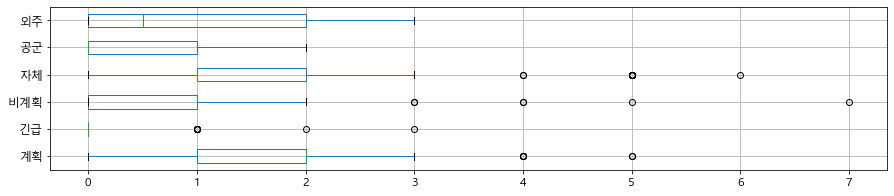

In [20]:
plt.figure(figsize=[15,3])
boxplot=df.boxplot(column=['계획', '긴급', '비계획', '자체', '공군', '외주'],vert=0)

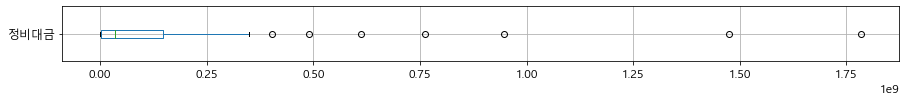

In [21]:
plt.figure(figsize=[15,1])
boxplot=df.boxplot(column=['정비대금'],vert=0)

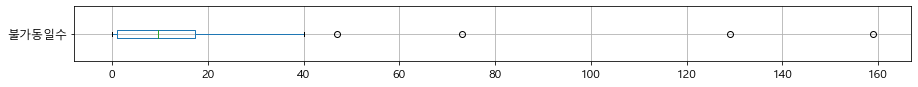

In [22]:
plt.figure(figsize=[15,1])
boxplot=df.boxplot(column=['불가동일수'],vert=0)

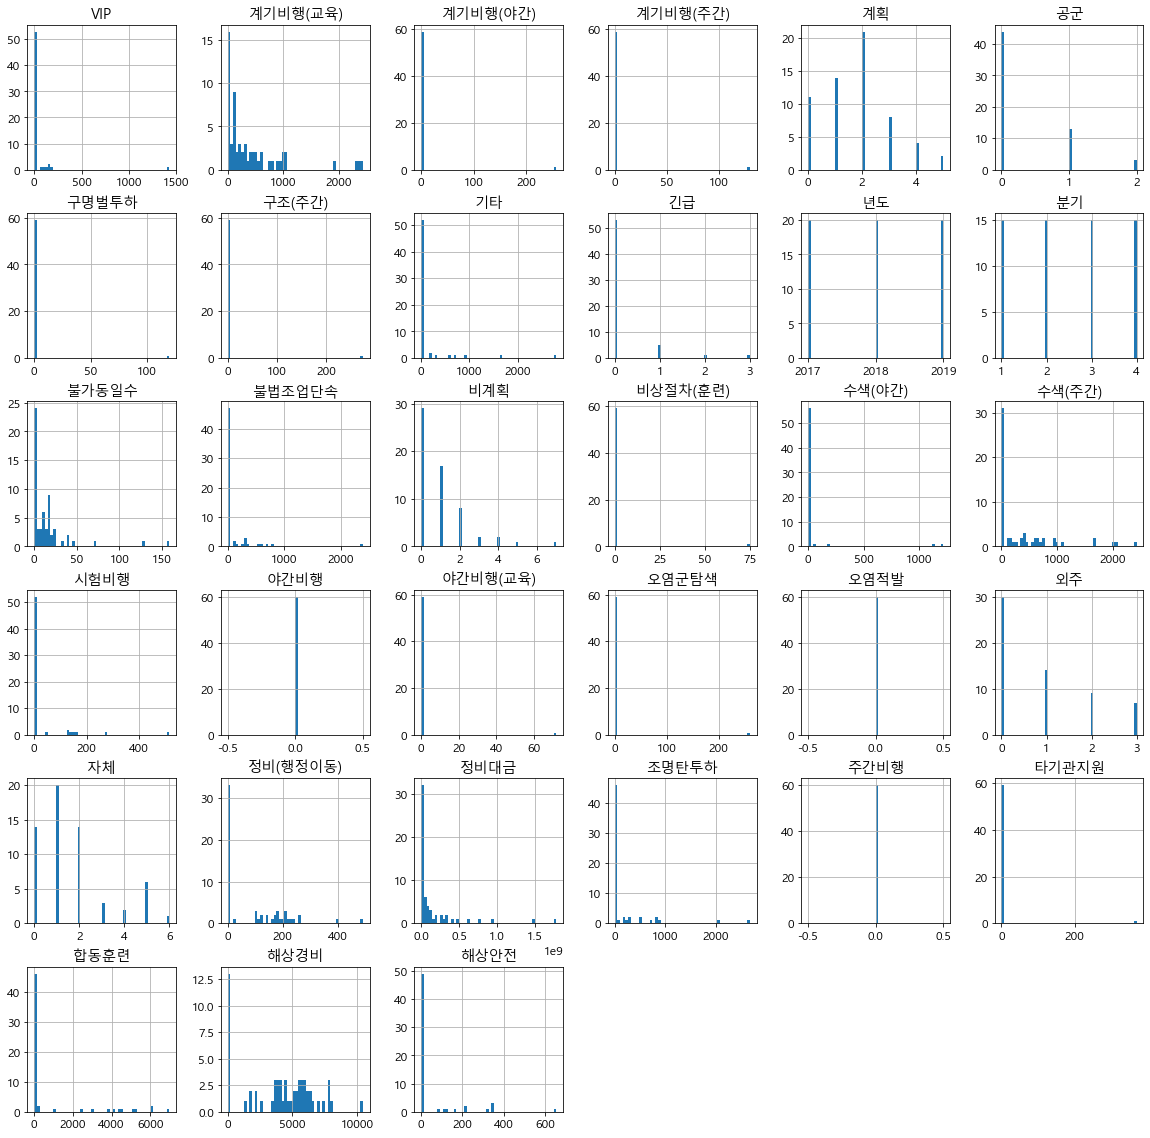

In [23]:
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,20))
plt.show()

이상치 제거 필요 : 정비대금, 불가동일수

### - 비행 실적을 시각화 하기 위해 NaN으로 바꿈

In [24]:
df = df.replace(0, np.NaN)

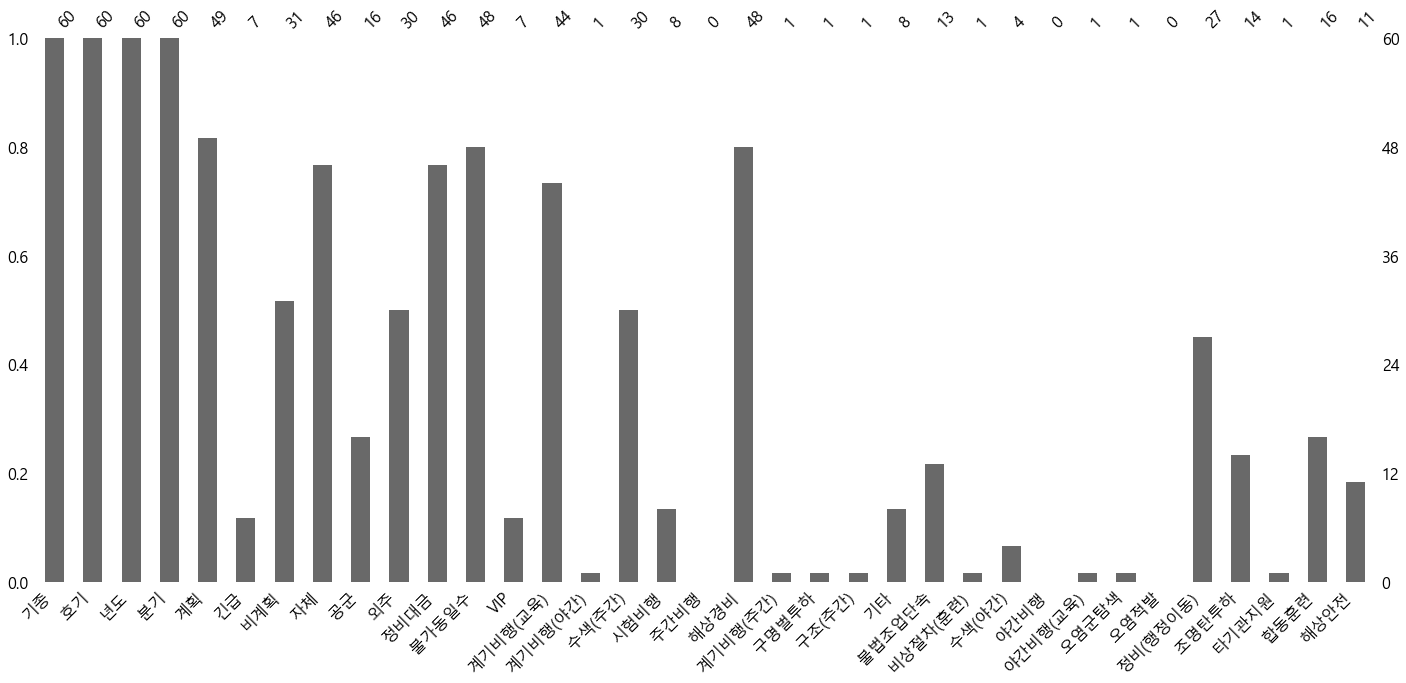

In [25]:
msno.bar(df)

#### - 3년간 건수
0 : 주간비행, 야간비행, 오염적발<br>
1 : 계기비행(야간), 계기비행(주간), 구명벌투하, 구조, 비상절차(훈련), 야간비행(교육), 오염군탐색, 타기관지원<br>
-> 분석에서 제거

In [26]:
df_1=df.drop(['주간비행', '야간비행', '오염적발','계기비행(야간)', '계기비행(주간)', 
              '구명벌투하', '구조(주간)', '비상절차(훈련)', '야간비행(교육)', '오염군탐색', '타기관지원'],axis=1)

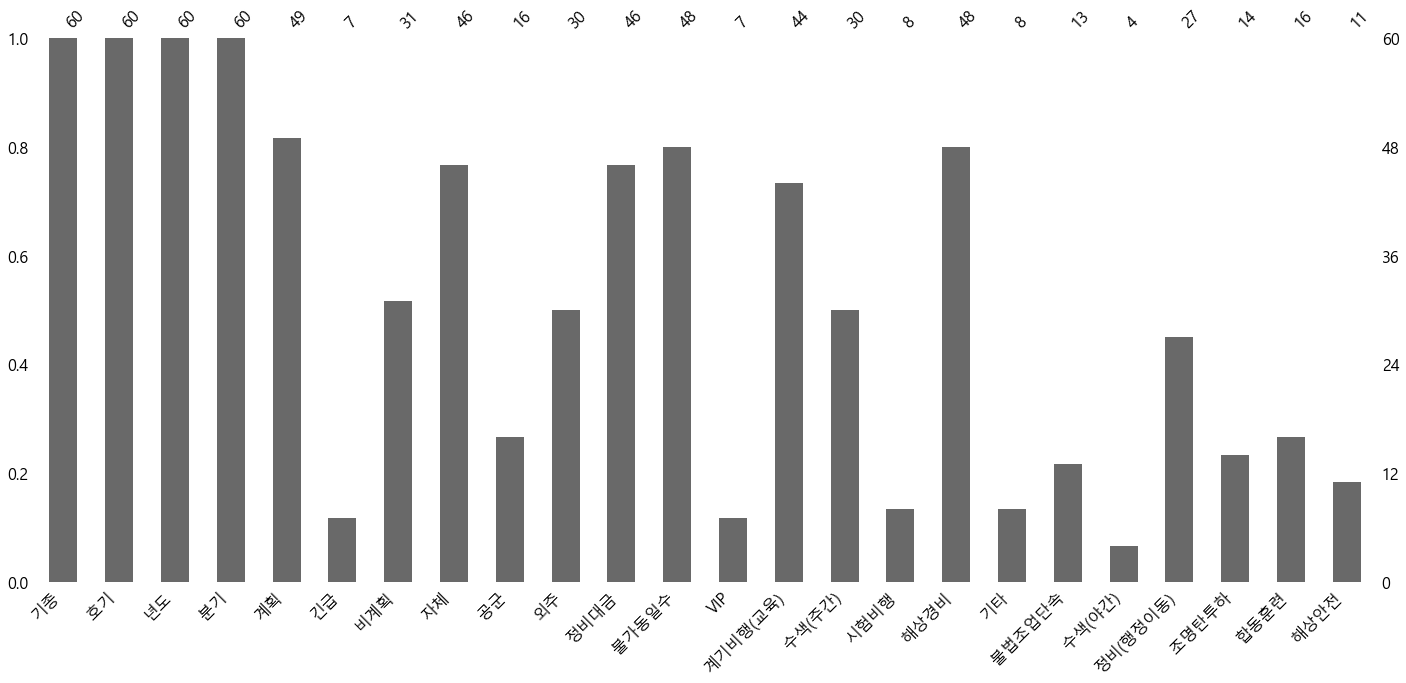

In [28]:
msno.bar(df_1)

In [29]:
df_2 = df_1.replace(np.NaN,0)

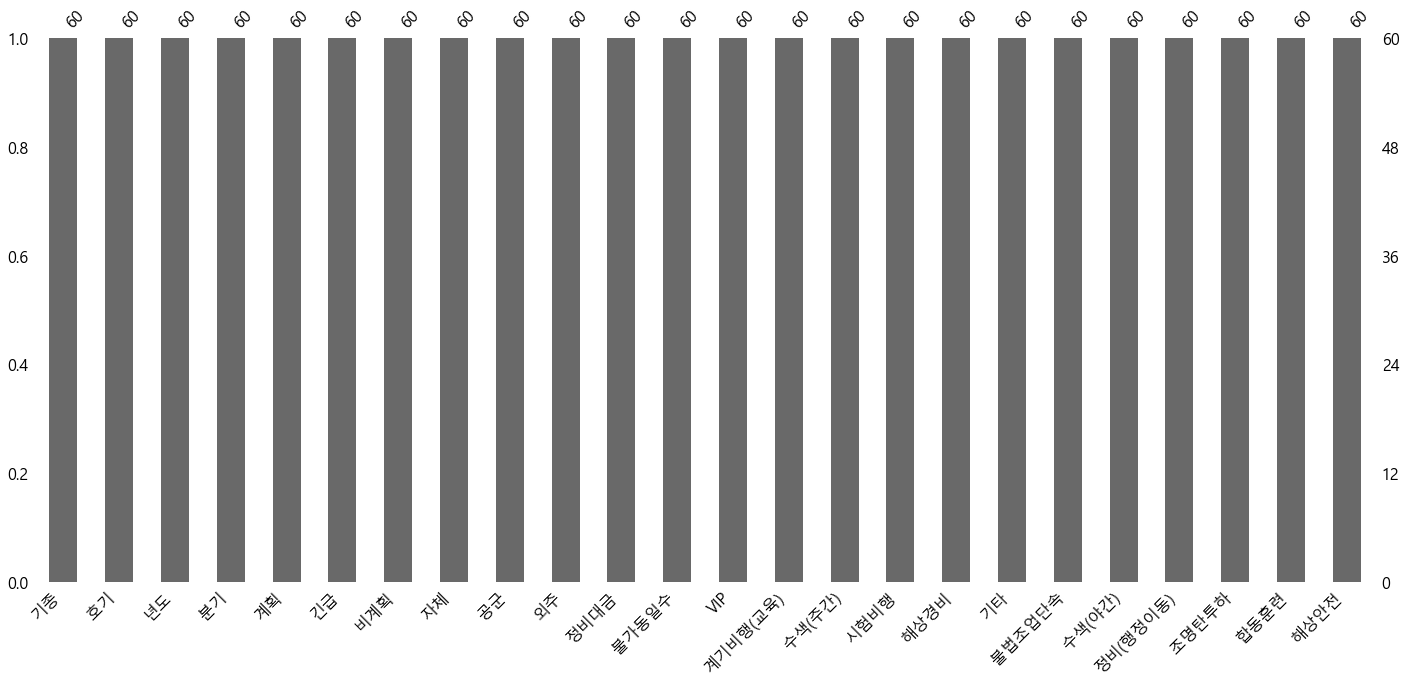

In [30]:
#다시 0으로 변환됐는지 확인
msno.bar(df_2)

In [31]:
heatmap_data = df[['년도', '분기', '계획', '긴급', '비계획', '자체', '공군', '외주', '정비대금','불가동일수', 'VIP', '계기비행(교육)', '수색(주간)', 
 '시험비행','해상경비', '기타', '불법조업단속','수색(야간)','정비(행정이동)', '조명탄투하','합동훈련', '해상안전']]

In [32]:
heatmap_data = df[['정비대금','비계획','외주','자체','해상안전','계획']]

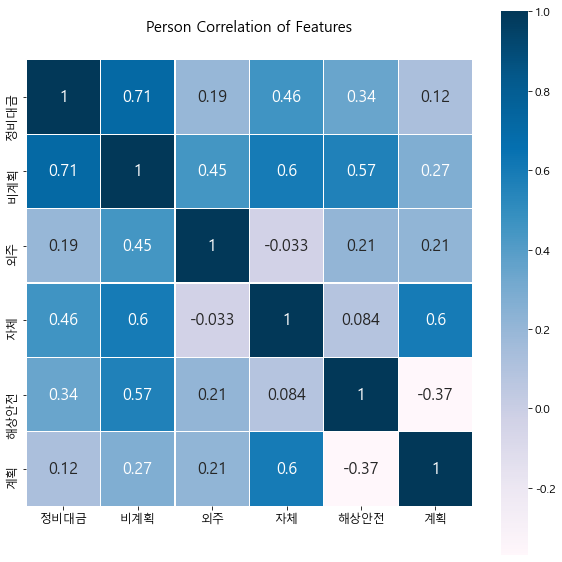

In [33]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(10,10)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [38]:
sns.relplot(x="불가동일수",y='정비대금',hue='자체',size='size',data=df_2)

ValueError: Could not interpret input 'size'

In [13]:
corr_matrix=df_2.corr()
corr_matrix['정비대금'].sort_values(ascending=False)

정비대금        1.000000
비계획         0.515731
외주          0.339548
자체          0.325432
해상안전        0.295340
년도          0.228140
계획          0.211745
시험비행        0.168370
계기비행(교육)    0.113469
수색(주간)      0.111589
불가동일수       0.083258
해상경비        0.063660
불법조업단속      0.053120
공군          0.002491
VIP        -0.014414
조명탄투하      -0.027344
정비(행정이동)   -0.047014
분기         -0.047749
기타         -0.076065
합동훈련       -0.079465
수색(야간)     -0.087725
긴급         -0.107533
Name: 정비대금, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023687466A00>,
      dtype=object)

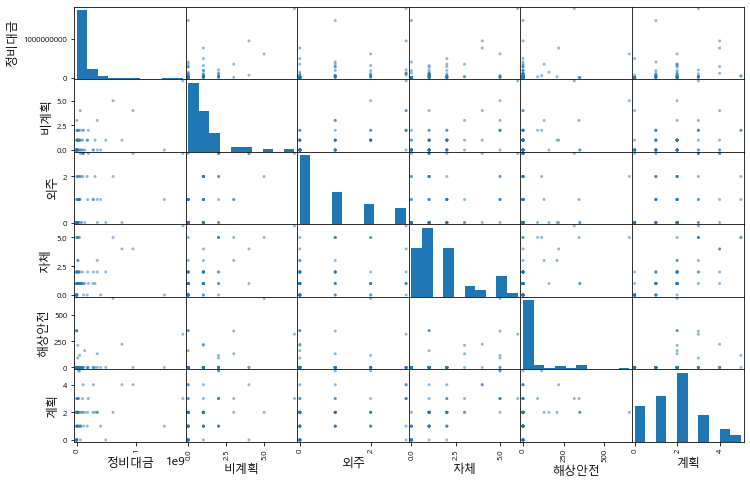

In [14]:
#corr>0.2 변수들로 scatter matrix

from pandas.plotting import scatter_matrix

attributes=['정비대금','비계획','외주','자체','해상안전','계획']
scatter_matrix(df_2[attributes],figsize=(12,8))

- 연속형 데이터 분포

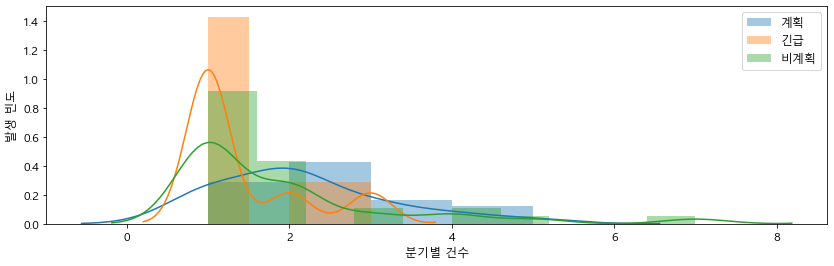

In [21]:
sns.distplot(df['계획'],label='계획')
sns.distplot(df['긴급'],label='긴급')
sns.distplot(df['비계획'],label='비계획')
plt.xlabel('분기별 건수')
plt.ylabel('발생 빈도')
plt.legend()

C:\Users\KCG\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


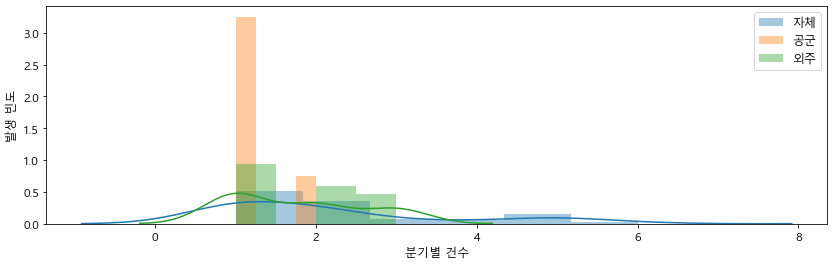

In [22]:
sns.distplot(df['자체'],label='자체')
sns.distplot(df['공군'],label='공군')
sns.distplot(df['외주'],label='외주')
plt.xlabel('분기별 건수')
plt.ylabel('발생 빈도')
plt.legend()

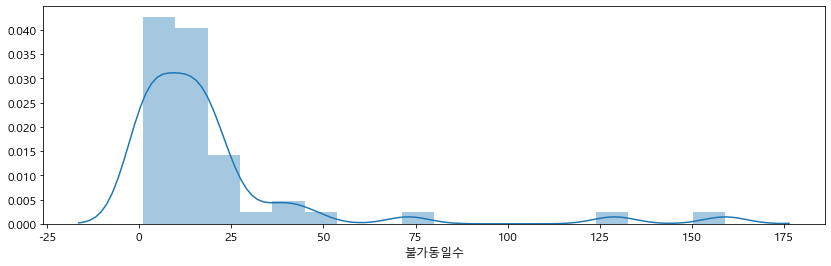

In [23]:
sns.distplot(df['불가동일수'])

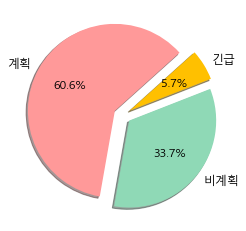

In [24]:
ratio = [106,10,59]
labels = ['계획', '긴급', '비계획']
explode = [0.1,0.1,0.1]
colors = ['#ff9999', '#ffc000', '#8fd9b6']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, 
        explode=explode, shadow=True,colors=colors)
plt.show()

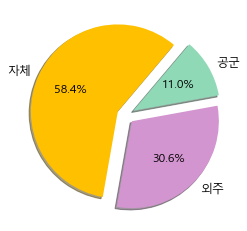

In [25]:
ratio = [101,19,53]
labels = ['자체', '공군', '외주']
explode = [0.1,0.1,0.1]
colors = ['#ffc000', '#8fd9b6', '#d395d0']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, 
        explode=explode, shadow=True,colors=colors)
plt.show()

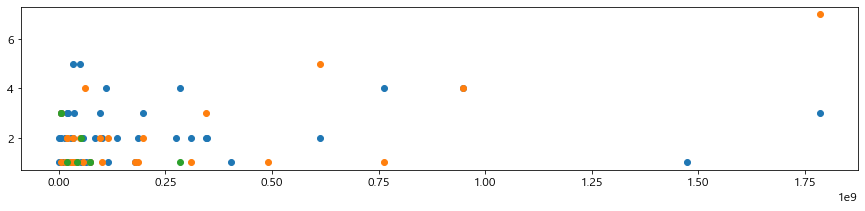

In [26]:
plt.figure(figsize=[15,3])
plt.scatter(df['정비대금'],df['계획'])
plt.scatter(df['정비대금'],df['비계획'])
plt.scatter(df['정비대금'],df['긴급'])

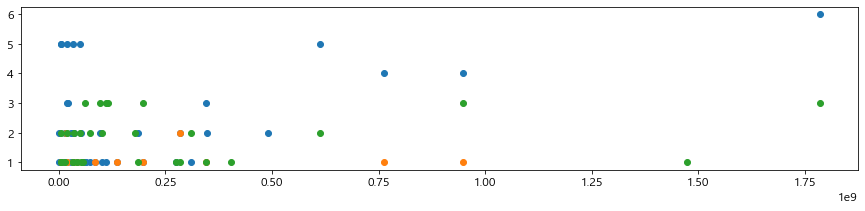

In [27]:
plt.figure(figsize=[15,3])
plt.scatter(df['정비대금'],df['자체'])
plt.scatter(df['정비대금'],df['공군'])
plt.scatter(df['정비대금'],df['외주'])

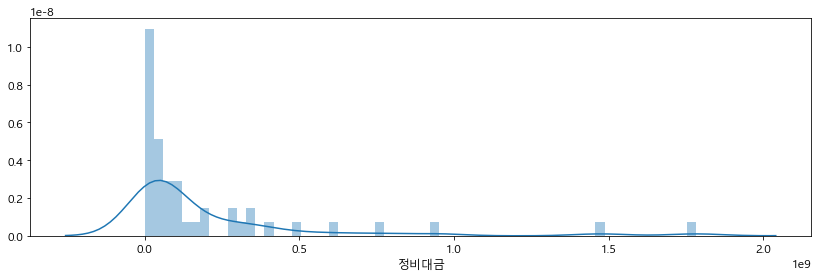

In [28]:
sns.distplot(df['정비대금'],bins=60)

- EDA 끝

# 더미변수화

In [15]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기종        60 non-null     object 
 1   호기        60 non-null     object 
 2   년도        60 non-null     int64  
 3   분기        60 non-null     int64  
 4   계획        60 non-null     float64
 5   긴급        60 non-null     float64
 6   비계획       60 non-null     float64
 7   자체        60 non-null     float64
 8   공군        60 non-null     float64
 9   외주        60 non-null     float64
 10  정비대금      60 non-null     float64
 11  불가동일수     60 non-null     float64
 12  VIP       60 non-null     float64
 13  계기비행(교육)  60 non-null     float64
 14  수색(주간)    60 non-null     float64
 15  시험비행      60 non-null     float64
 16  해상경비      60 non-null     float64
 17  기타        60 non-null     float64
 18  불법조업단속    60 non-null     float64
 19  수색(야간)    60 non-null     float64
 20  정비(행정이동)  60 non-null     float64


더미 변수화 필요 : 기종, 호기, 년도, 분기

In [16]:
df_dummy=pd.get_dummies(data=df_2,columns=['기종','호기','년도','분기'])

In [17]:
df_dummy.head()

,계획,긴급,비계획,자체,공군,외주,정비대금,불가동일수,VIP,계기비행(교육),수색(주간),시험비행,해상경비,기타,불법조업단속,수색(야간),정비(행정이동),조명탄투하,합동훈련,해상안전,기종_CL-604,기종_CN235,호기_B701,호기_B703,호기_B704,호기_B705,호기_B706,년도_2017,년도_2018,년도_2019,분기_1,분기_2,분기_3,분기_4
0,2.0,0.0,1.0,2.0,0.0,1.0,13510733.33,10.0,0.0,455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4385.0,0.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
1,0.0,0.0,4.0,1.0,0.0,3.0,61510166.67,1.0,0.0,505.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4135.0,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
2,2.0,0.0,0.0,1.0,0.0,0.0,29126400.00,1.0,135.0,330.0,0.0,0.0,0.0,923.0,0.0,0.0,0.0,0.0,3020.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
3,2.0,0.0,1.0,1.0,0.0,1.0,56328000.00,7.0,175.0,60.0,0.0,0.0,0.0,1640.0,0.0,0.0,0.0,0.0,4613.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
4,2.0,0.0,1.0,2.0,0.0,1.0,33380600.00,0.0,0.0,913.0,0.0,0.0,0.0,2798.0,0.0,0.0,0.0,0.0,5283.0,0.0,1,0,1,0,0,0,0,0,1,0,1,0,0,0


In [32]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   계획         60 non-null     float64
 1   긴급         60 non-null     float64
 2   비계획        60 non-null     float64
 3   자체         60 non-null     float64
 4   공군         60 non-null     float64
 5   외주         60 non-null     float64
 6   정비대금       60 non-null     float64
 7   불가동일수      60 non-null     float64
 8   VIP        60 non-null     float64
 9   계기비행(교육)   60 non-null     float64
 10  수색(주간)     60 non-null     float64
 11  시험비행       60 non-null     float64
 12  해상경비       60 non-null     float64
 13  기타         60 non-null     float64
 14  불법조업단속     60 non-null     float64
 15  수색(야간)     60 non-null     float64
 16  정비(행정이동)   60 non-null     float64
 17  조명탄투하      60 non-null     float64
 18  합동훈련       60 non-null     float64
 19  해상안전       60 non-null     float64
 20  기종_CL-604  6

In [18]:
corr_matrix=df_dummy.corr()
corr_matrix['정비대금'].sort_values(ascending=False)

정비대금         1.000000
비계획          0.515731
외주           0.339548
자체           0.325432
해상안전         0.295340
계획           0.211745
시험비행         0.168370
호기_B703      0.161014
년도_2019      0.157708
계기비행(교육)     0.113469
수색(주간)       0.111589
불가동일수        0.083258
년도_2018      0.079735
기종_CN235     0.068387
해상경비         0.063660
불법조업단속       0.053120
분기_2         0.034053
호기_B704      0.023143
분기_1         0.022688
공군           0.002491
분기_3        -0.012882
VIP         -0.014414
호기_B705     -0.020561
조명탄투하       -0.027344
분기_4        -0.043859
정비(행정이동)    -0.047014
기종_CL-604   -0.068387
호기_B701     -0.068387
기타          -0.076065
합동훈련        -0.079465
수색(야간)      -0.087725
호기_B706     -0.095208
긴급          -0.107533
년도_2017     -0.237443
Name: 정비대금, dtype: float64

In [19]:
df_2=df_dummy

- 더미변수화 완료

# 이상치 제거

In [35]:
df_2.columns

Index(['계획', '긴급', '비계획', '자체', '공군', '외주', '정비대금', '불가동일수', 'VIP', '계기비행(교육)',
       '수색(주간)', '시험비행', '해상경비', '기타', '불법조업단속', '수색(야간)', '정비(행정이동)', '조명탄투하',
       '합동훈련', '해상안전', '기종_CL-604', '기종_CN235', '호기_B701', '호기_B703',
       '호기_B704', '호기_B705', '호기_B706', '년도_2017', '년도_2018', '년도_2019',
       '분기_1', '분기_2', '분기_3', '분기_4'],
      dtype='object')

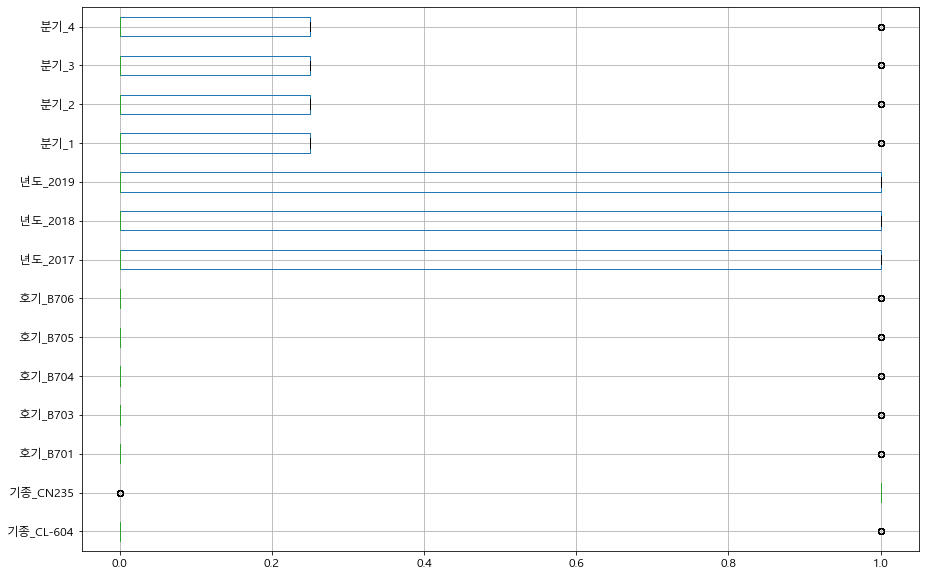

In [36]:
plt.figure(figsize=[15,10])
boxplot=df_2.boxplot(column=['기종_CL-604', '기종_CN235', '호기_B701', '호기_B703',
       '호기_B704', '호기_B705', '호기_B706', '년도_2017', '년도_2018', '년도_2019',
       '분기_1', '분기_2', '분기_3', '분기_4'],vert=0)

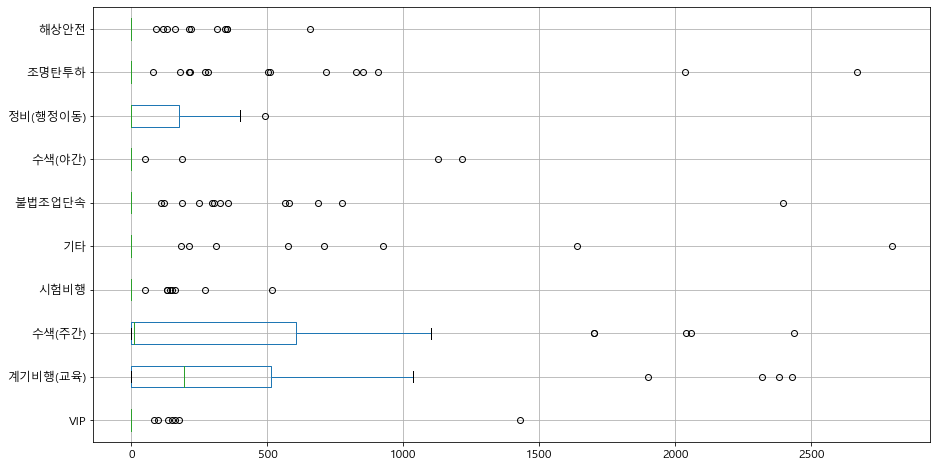

In [37]:
plt.figure(figsize=[15,8])
boxplot=df_2.boxplot(column=['VIP', '계기비행(교육)','수색(주간)', '시험비행', 
                             '기타', '불법조업단속', '수색(야간)', '정비(행정이동)', 
                             '조명탄투하','해상안전'],vert=0)

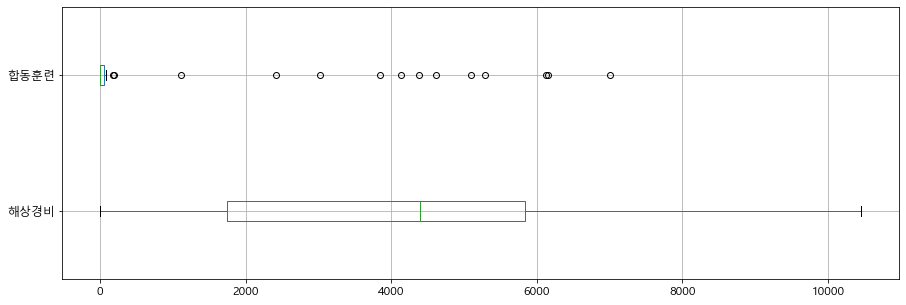

In [38]:
plt.figure(figsize=[15,5])
boxplot=df_2.boxplot(column=['해상경비', '합동훈련'],vert=0)

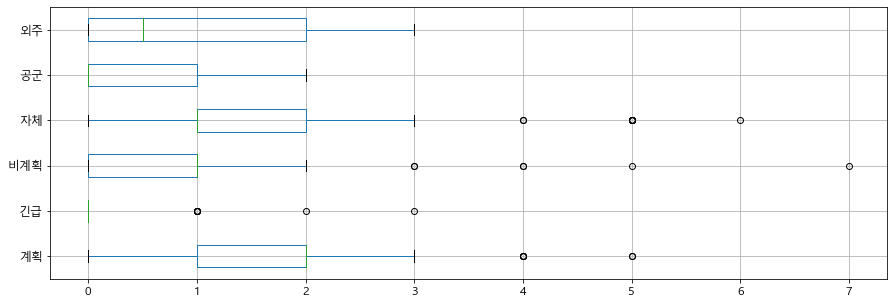

In [39]:
plt.figure(figsize=[15,5])
boxplot=df_2.boxplot(column=['계획', '긴급', '비계획', '자체', '공군', '외주'],vert=0)

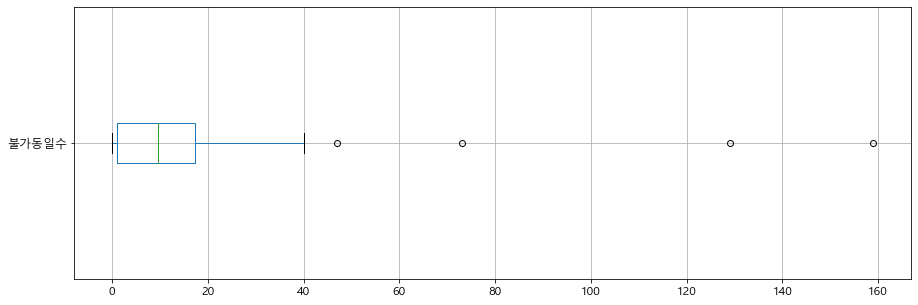

In [40]:
plt.figure(figsize=[15,5])
boxplot=df_2.boxplot(column=['불가동일수'],vert=0)

In [41]:
df_out=df_2[df_2.정비대금<1000000000]

In [42]:
df_out=df_out[df_out.불가동일수<100]

In [43]:
df_out.describe()

,계획,긴급,비계획,자체,공군,외주,정비대금,불가동일수,VIP,계기비행(교육),수색(주간),시험비행,해상경비,기타,불법조업단속,수색(야간),정비(행정이동),조명탄투하,합동훈련,해상안전,기종_CL-604,기종_CN235,호기_B701,호기_B703,호기_B704,호기_B705,호기_B706,년도_2017,년도_2018,년도_2019,분기_1,분기_2,분기_3,분기_4
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.678571,0.125000,0.892857,1.517857,0.339286,0.821429,1.183585e+08,10.821429,39.767857,403.982143,365.607143,25.285714,3910.017857,131.250,120.660714,46.017857,92.357143,170.142857,957.982143,44.821429,0.214286,0.785714,0.214286,0.178571,0.196429,0.214286,0.196429,0.357143,0.321429,0.321429,0.250000,0.250000,0.250000,0.250000
std,1.222622,0.384353,1.170525,1.388146,0.580808,1.046329,1.984652e+08,13.606292,193.957070,569.047322,558.128649,84.256257,2729.586266,455.544,360.300596,220.102909,115.768017,479.379805,1979.285404,122.374107,0.414039,0.414039,0.414039,0.386459,0.400892,0.414039,0.400892,0.483494,0.471251,0.471251,0.436931,0.436931,0.436931,0.436931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.432500e+05,1.000000,0.000000,0.000000,0.000000,0.000000,1626.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.125350e+07,8.000000,0.000000,193.500000,10.000000,0.000000,4388.500000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,2.000000,1.000000,1.250000,1.217056e+08,17.000000,0.000000,513.750000,603.750000,0.000000,5842.250000,0.000,0.000000,0.000000,180.000000,0.000000,106.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000
max,5.000000,2.000000,5.000000,5.000000,2.000000,3.000000,9.470841e+08,73.000000,1430.000000,2430.000000,2435.000000,516.000000,10457.000000,2798.000,2394.000000,1215.000000,492.000000,2666.000000,7001.000000,655.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df_2=df_out

# 스케일링

In [20]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
a=scale.fit_transform(df_2['정비대금'].values.reshape(-1,1))

In [21]:
df_2.insert(1,'정비대금_스케일링',a)

In [22]:
df_3=df_2.drop(['정비대금'],1)

In [48]:
# df_3=df_3.drop(['기종_CL-604', '기종_CN235', '호기_B701','호기_B703', '호기_B704', 
#                 '호기_B705', '호기_B706', '년도_2017', '년도_2018','년도_2019', 
#                 '분기_1', '분기_2', '분기_3', '분기_4'],1)

- 스케일링 완료

# 계층적 샘플링

In [49]:
# df_3['비계획구분']=np.ceil(df_3['비계획']/1.5)
# df_3['비계획구분'].where(df_3['비계획구분']<3,3.0,inplace=True)

# df_3['비계획구분'].value_counts()

# df_3['비계획구분'].hist()

# from sklearn.model_selection import train_test_split
# strat_train_set,strat_test_set=train_test_split(df_3,test_size=0.2,random_state=42,stratify=df_3['비계획구분'])

# strat_train_set['비계획구분'].value_counts()/len(strat_train_set)

# strat_test_set['비계획구분'].value_counts()/len(strat_test_set)

# #계층적 샘플링이 끝났으므로 '비계획구분' 변수는 더이상 필요 없음 -> 변수 제거
# train=strat_train_set.drop(['비계획구분'],axis=1)
# test=strat_test_set.drop(['비계획구분'],axis=1)

# train=train.reset_index(drop=True)
# test=test.reset_index(drop=True)

- 계층적 샘플링 완료

In [68]:
df_3.columns

Index(['계획', '정비대금_스케일링', '긴급', '비계획', '자체', '공군', '외주', '불가동일수', 'VIP',
       '계기비행(교육)', '수색(주간)', '시험비행', '해상경비', '기타', '불법조업단속', '수색(야간)',
       '정비(행정이동)', '조명탄투하', '합동훈련', '해상안전', '기종_CL-604', '기종_CN235', '호기_B701',
       '호기_B703', '호기_B704', '호기_B705', '호기_B706', '년도_2017', '년도_2018',
       '년도_2019', '분기_1', '분기_2', '분기_3', '분기_4'],
      dtype='object')

# 모델 설계 및 학습

## 1. OLS 회귀분석

In [50]:
import statsmodels.api as sm

train_y=df_3['정비대금_스케일링']
train_x=df_3.drop('정비대금_스케일링',axis=1)

In [51]:
train_x1=sm.add_constant(train_x,has_constant='add')

In [52]:
multi_model = sm.OLS(train_y, train_x1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              정비대금_스케일링   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     1.418
Date:                Mon, 11 Jan 2021   Prob (F-statistic):              0.184
Time:                        10:07:03   Log-Likelihood:                 33.884
No. Observations:                  56   AIC:                            -9.767
Df Residuals:                      27   BIC:                             48.97
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0156      0.053      0.293      0.772      -0.094       0.125
계획            -0.1500      0.153     -0.984      0.334      -0.463       0.163
긴급            -0.3239      0.186     -1.745      0.092      -0.705       0.057
비계획           -0.1161      0.164     -0.708      0.485      -0.452       0.220
자체             0.1955      0.157      1.246      0.223      -0.126       0.517
공군             0.2053      0.190      1.079      0.290      -0.185       0.596
외주             0.2060      0.164      1.255      0.220      -0.131       0.543
불가동일수          0.0035      0.004      0.971      0.340      -0.004       0.011
VIP           -0.0003      0.000     -1.376      0.180      -0.001       0.000
계기비행(교육)    1.255e-05   9.39e-05      0.134      0.895      -0.000       0.000
수색(주간)      1.765e-05   7.08e-05      0.249      0.805      -0.000       0.000
시험비행           0.0003      0.000      0.687      0.498      -0.001       0.001
해상경비        1.531e-05   2.05e-05      0.746      0.462   -2.68e-05    5.74e-05
기타           2.26e-06   7.88e-05      0.029      0.977      -0.000       0.000
불법조업단속      3.138e-05   9.21e-05      0.341      0.736      -0.000       0.000
수색(야간)      -2.47e-05      0.000     -0.078      0.938      -0.001       0.001
정비(행정이동)       0.0001      0.000      0.383      0.705      -0.001       0.001
조명탄투하         -0.0002      0.000     -0.989      0.332      -0.000       0.000
합동훈련       -6.956e-05   5.18e-05     -1.344      0.190      -0.000    3.66e-05
해상안전       -9.104e-05      0.000     -0.241      0.811      -0.001       0.001
기종_CL-604      0.1262      0.098      1.291      0.208      -0.074       0.327
기종_CN235      -0.1105      0.077     -1.439      0.162      -0.268       0.047
호기_B701        0.1262      0.098      1.291      0.208      -0.074       0.327
호기_B703        0.1195      0.077      1.551      0.133      -0.039       0.277
호기_B704       -0.0402      0.091     -0.442      0.662      -0.227       0.147
호기_B705       -0.1878      0.091     -2.071      0.048      -0.374      -0.002
호기_B706       -0.0020      0.075     -0.026      0.979      -0.156       0.152
년도_2017       -0.0311      0.055     -0.568      0.575      -0.144       0.081
년도_2018        0.0797      0.051      1.554      0.132      -0.026       0.185
년도_2019       -0.0329      0.066     -0.500      0.621      -0.168       0.102
분기_1          -0.0448      0.058     -0.769      0.448      -0.164       0.075
분기_2          -0.0835      0.063     -1.327      0.196      -0.213       0.046
분기_3           0.0473      0.060      0.791      0.436      -0.075       0.170
분기_4           0.0966      0.063      1.529      0.138      -0.033       0.226
==============================================================================
Omnibus:                        3.266   Durbin-Watson:                   2.212
Pr

## 2. 다중 선형 회귀 분석

In [53]:
from sklearn import linear_model

In [69]:
from sklearn.model_selection import train_test_split

y=df_3['정비대금_스케일링']
X=df_3.drop('정비대금_스케일링',axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,shuffle=False,random_state=42)

In [71]:
import mglearn

from sklearn.linear_model import LinearRegression


lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_ : {}".format(lr.intercept_))

print("훈련 세트의 정확도 : {:.5f}".format(lr.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.5f}".format(lr.score(X_test,y_test)))

lr.coef_: [-4.54304611e-01 -6.47737415e-01 -6.21982199e-01  6.93473622e-01
  4.98902413e-01  5.02186393e-01 -7.18008298e-03  6.85081086e-05
 -3.82082282e-04  5.20581486e-05  2.38555570e-03 -7.32465361e-05
  9.66961196e-05  6.73999087e-06 -7.59687020e-04 -6.93999296e-04
  1.05955543e-04 -3.85759040e-05  1.40022745e-03 -8.61591068e-03
  8.61591068e-03 -8.61591068e-03 -1.08624411e-01  1.17240321e-01
 -5.13478149e-16  0.00000000e+00  4.84393089e-02 -9.16614097e-02
  4.32221008e-02 -3.14738559e-01  2.77473912e-01 -1.57063545e-02
  5.29710012e-02]
lr.intercept_ : 0.3862246455977034
훈련 세트의 정확도 : 0.99514
테스트 세트의 정확도 : -5.86299


In [72]:
print(lr)

LinearRegression()


In [73]:
y_true=y_test
y_pred=lr.predict(X_test)

In [74]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [75]:
regression_results(y_test,y_pred)

explained_variance:  -5.8019
r2:  -5.863
MAE:  0.3976
MSE:  0.3295
RMSE:  0.574


## 3. KNN 모델

In [77]:
y=df_3['정비대금_스케일링']
X=df_3.drop('정비대금_스케일링',axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=False,random_state=42)

In [79]:
from sklearn.neighbors import KNeighborsRegressor

In [80]:
# 이웃의 수를 3으로 하여 객체를 만든다

reg = KNeighborsRegressor(n_neighbors=3)

# 훈련하기

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [81]:
# 테스트 세트 예층

print("테스트 세트 예측 : {}".format(reg.predict(X_test)))


# 모델을 평가할떄는 score를 사용한다.

# 회귀모델일때 R^2값을 반환한다.

# 예측의 적합도를 0~1로 계산한 값이다.

print("테스트 세트의 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측 : [0.0727028  0.00517602 0.01986148 0.23822283 0.02947    0.19232064
 0.01614767 0.29376906 0.23822283 0.01986148 0.01986148 0.01467462
 0.01986148 0.29376906 0.0345361  0.23822283 0.01467462]
테스트 세트의 R^2 : -0.30


## 4. Ridge 회귀 모델 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=False,random_state=42)

In [84]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

ridge = Ridge().fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train,y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트의 정확도 : 0.86
테스트 세트의 정확도 : -1.09


In [85]:
ridge = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트의 정확도 : 0.75
테스트 세트의 정확도 : -0.55


In [86]:
ridge = Ridge(alpha=0.0000000000001).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트의 정확도 : 0.91
테스트 세트의 정확도 : -1.71


C:\Users\KCG\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44437e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


## 5. Lasso 모델

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=False,random_state=42)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.36
테스트 세트의 정확도 : -0.32
사용한 특성의 수 : 10
사용한 max_iter : 21


- 모델 설계 및 학습 완료

## 6. XGBoost 모델

In [90]:
!pip install xgboost

In [91]:
import xgboost
from sklearn.metrics import explained_variance_score

In [92]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

39 17


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

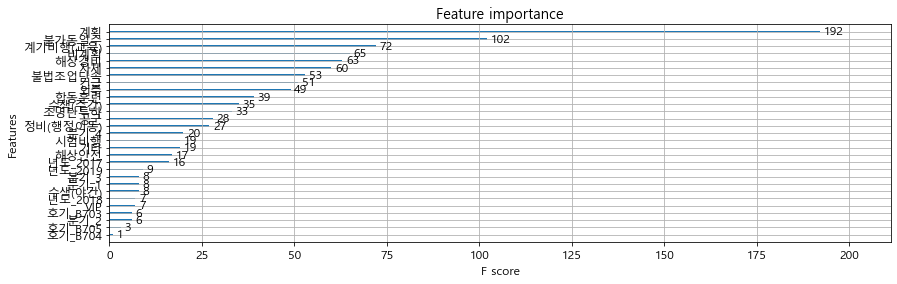

In [93]:
xgboost.plot_importance(xgb_model)

In [94]:
predictions = xgb_model.predict(X_test)
predictions

array([ 0.31723326,  0.0804867 ,  0.03748773,  0.08492916,  0.2927615 ,
        0.23274584, -0.03790975, -0.02784611,  0.02781004,  0.03096826,
        0.10696137,  0.23182066,  0.04016205,  0.02299244,  0.11247279,
        0.34049568,  0.06384183], dtype=float32)

In [95]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.9981471639979093
-3.344466940639494


뭐지..?

In [96]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [97]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, max_depth=7)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

In [98]:
xgb_pred

array([ 0.35312834,  0.12558062,  0.01843997,  0.07427789,  0.34386876,
        0.30620864, -0.00749034, -0.00260476,  0.05704408,  0.01818902,
        0.09123532,  0.21091214,  0.04929244,  0.05477564,  0.19299039,
        0.3420788 ,  0.1298379 ], dtype=float32)

In [99]:
metrics(y_test,xgb_pred)

TypeError: 'module' object is not callable

In [ ]:
metrics

...?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=False,random_state=42)

In [ ]:
model = XGBClassifier()
model.fit(X=X_train, y=y_train)
model

In [ ]:
fscore = model.get_booster().get_fscore()
plot_importance(model)

In [ ]:
from xgboost import XGBClassifier # model
from xgboost import plot_importance # 중요변수 시각화
from sklearn.model_selection import train_test_split # train/test
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # model 평가

In [ ]:
y_pred = model.predict(X_test) # 예측치
y_true = y_test # 정답

acc = accuracy_score(y_true, y_pred)

con_mat = confusion_matrix(y_true, y_pred)
con_mat
report = classification_report(y_true, y_pred)
print(report)

# 다중공선성 확인 및 제거

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# multi_model.exog_names

In [ ]:
# pd.DataFrame({'컬럼': column, 
#               'VIF': variance_inflation_factor(multi_model.exog, i)} 
#              for i, column in enumerate(multi_model.exog_names)
#              if column != 'const') 

# 초기모델

In [100]:
df_3.columns

Index(['계획', '정비대금_스케일링', '긴급', '비계획', '자체', '공군', '외주', '불가동일수', 'VIP',
       '계기비행(교육)', '수색(주간)', '시험비행', '해상경비', '기타', '불법조업단속', '수색(야간)',
       '정비(행정이동)', '조명탄투하', '합동훈련', '해상안전', '기종_CL-604', '기종_CN235', '호기_B701',
       '호기_B703', '호기_B704', '호기_B705', '호기_B706', '년도_2017', '년도_2018',
       '년도_2019', '분기_1', '분기_2', '분기_3', '분기_4'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df_3,test_size=0.2,random_state=42)

In [25]:
from pycaret.regression import *
exp1=setup(train,target='정비대금_스케일링',train_size=0.8)

,Description,Value
0,session_id,1705
1,Target,정비대금_스케일링
2,Original Data,"(48, 34)"
3,Missing Values,False
4,Numeric Features,33
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(38, 31)"


In [26]:
best_5=compare_models(sort='RMSE',n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1144,0.0331,0.1486,-20.5528,0.1229,90.1257,1.0970
llar,Lasso Least Angle Regression,0.1209,0.0317,0.1506,-46.9216,0.1250,61.5106,0.0130
lightgbm,Light Gradient Boosting Machine,0.1209,0.0317,0.1506,-46.9216,0.1250,61.5106,0.0340
knn,K Neighbors Regressor,0.1181,0.0338,0.1549,-25.3771,0.1291,36.3678,0.0210
rf,Random Forest Regressor,0.1260,0.0378,0.1629,-30.3671,0.1338,172.4542,0.1830
ada,AdaBoost Regressor,0.1261,0.0476,0.1670,-14.5420,0.1322,95.8960,0.0560
et,Extra Trees Regressor,0.1446,0.0471,0.1876,-42.0672,0.1526,92.2941,0.1460
gbr,Gradient Boosting Regressor,0.1434,0.0503,0.1878,-51.9358,0.1513,176.9481,0.0370
dt,Decision Tree Regressor,0.1398,0.0634,0.1940,-29.8256,0.1527,4.6567,0.0180
br,Bayesian Ridge,0.1503,0.0535,0.1962,-47.6553,0.1502,119.0919,0.0120


In [114]:
# lar=create_model('lar',cross_validation=False)

lr=create_model('lr',cross_validation=False)
ridge=create_model('ridge',cross_validation=False)
huber=create_model('huber',cross_validation=False)
en=create_model('en',cross_validation=False)
lasso=create_model('lasso',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1285,0.0206,0.1434,-0.4386,0.1228,13.1215


In [115]:
# tuned_lar=tune_model(lar,optimize='RMSE',n_iter=10)
tuned_huber=tune_model(huber,optimize='RMSE',n_iter=10)
tuned_lr=tune_model(lr,optimize='RMSE',n_iter=10)
tuned_ridge=tune_model(ridge,optimize='RMSE',n_iter=10)
tuned_lasso=tune_model(lasso,optimize='RMSE',n_iter=10)
tuned_en=tune_model(en,optimize='RMSE',n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1164,0.0152,0.1232,-0.3296,0.1062,5.4406
1,0.1355,0.0184,0.1356,-960.2414,0.1269,12.6681
2,0.0665,0.0058,0.0759,-3.2970,0.0703,2.1801
3,0.2363,0.1262,0.3552,-0.1080,0.2530,7.6066
4,0.0750,0.0060,0.0777,-0.5094,0.0711,1.6894
5,0.3453,0.2733,0.5228,-0.3096,0.3497,0.7255
6,0.1670,0.0379,0.1947,-0.0378,0.1593,1.2157
7,0.1633,0.0300,0.1732,-0.0000,0.1479,0.6663
8,0.1137,0.0132,0.1147,-56.6779,0.1070,4.3129
9,0.0910,0.0111,0.1055,-1.4090,0.0992,45.4357


In [116]:
blender_specific = blend_models(estimator_list = [tuned_lasso,tuned_en,tuned_huber,tuned_lr,tuned_ridge], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2417,0.0869,0.2948,-6.6122,0.1294,6.9836
1,0.3005,0.1102,0.3319,-5757.3948,0.2788,17.2036
2,0.2477,0.0646,0.2541,-47.1175,0.1793,5.1691
3,0.2006,0.0775,0.2784,0.3193,0.1928,9.4549
4,1.0893,2.0924,1.4465,-522.6437,0.7535,30.8371
5,0.4708,0.3363,0.5799,-0.6113,0.3827,3.3626
6,0.1294,0.0292,0.1708,0.2016,0.1357,1.1841
7,0.1138,0.0175,0.1322,0.4174,0.1097,0.5533
8,0.0795,0.0087,0.0932,-37.0544,0.0867,1.8547
9,0.1581,0.0270,0.1643,-4.8416,0.1485,55.1886


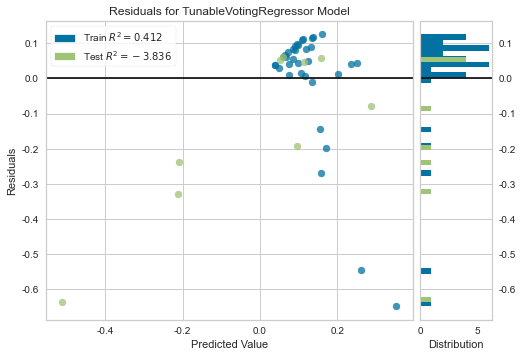

In [117]:
plot_model(blender_specific)

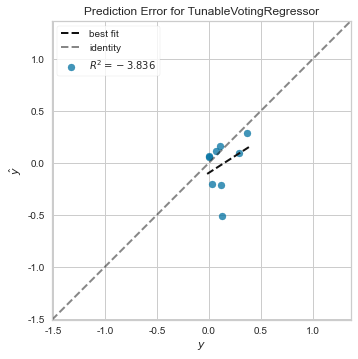

In [118]:
plot_model(blender_specific, plot='error')

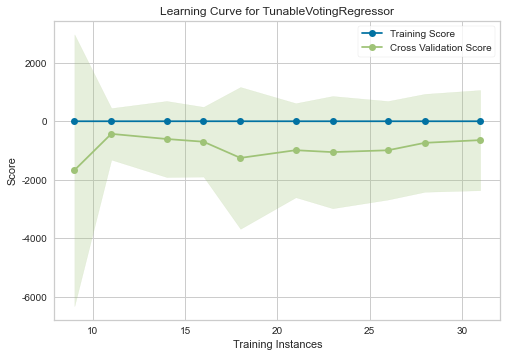

In [119]:
plot_model(blender_specific, plot='learning')

In [128]:
final_model = finalize_model(blender_specific)

In [129]:
pred = predict_model(final_model, data = test)

In [130]:
pred

,계획,정비대금_스케일링,긴급,비계획,자체,공군,외주,불가동일수,VIP,계기비행(교육),...,호기_B705,호기_B706,년도_2017,년도_2018,년도_2019,분기_1,분기_2,분기_3,분기_4,Label
0,2.0,0.014266,0.0,1.0,2.0,0.0,1.0,10.0,0.0,455.0,...,0,0,1,0,0,1,0,0,0,0.112015
5,2.0,0.327137,0.0,1.0,1.0,0.0,2.0,16.0,0.0,324.0,...,0,0,0,1,0,0,1,0,0,0.112004
36,2.0,0.000000,0.0,0.0,2.0,0.0,0.0,1.0,0.0,975.0,...,1,0,1,0,0,1,0,0,0,0.017257
13,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0.121114
20,2.0,0.646061,0.0,5.0,5.0,0.0,2.0,4.0,0.0,90.0,...,0,0,0,0,1,1,0,0,0,0.278143
53,2.0,0.020563,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,...,0,1,0,1,0,0,1,0,0,0.096428
39,0.0,0.517377,0.0,1.0,2.0,0.0,0.0,47.0,0.0,150.0,...,1,0,1,0,0,0,0,0,1,0.062268
29,3.0,0.023997,0.0,0.0,3.0,0.0,0.0,10.0,0.0,2430.0,...,0,0,0,1,0,0,1,0,0,0.127836
47,1.0,0.000000,0.0,2.0,2.0,1.0,0.0,23.0,0.0,120.0,...,1,0,0,0,1,0,0,0,1,0.073265
12,2.0,0.000000,1.0,0.0,1.0,2.0,0.0,17.0,0.0,120.0,...,0,0,1,0,0,1,0,0,0,0.128971


In [127]:
test

,계획,정비대금_스케일링,긴급,비계획,자체,공군,외주,불가동일수,VIP,계기비행(교육),...,호기_B704,호기_B705,호기_B706,년도_2017,년도_2018,년도_2019,분기_1,분기_2,분기_3,분기_4
0,2.0,0.014266,0.0,1.0,2.0,0.0,1.0,10.0,0.0,455.0,...,0,0,0,1,0,0,1,0,0,0
5,2.0,0.327137,0.0,1.0,1.0,0.0,2.0,16.0,0.0,324.0,...,0,0,0,0,1,0,0,1,0,0
36,2.0,0.000000,0.0,0.0,2.0,0.0,0.0,1.0,0.0,975.0,...,0,1,0,1,0,0,1,0,0,0
13,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
20,2.0,0.646061,0.0,5.0,5.0,0.0,2.0,4.0,0.0,90.0,...,0,0,0,0,0,1,1,0,0,0
53,2.0,0.020563,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
39,0.0,0.517377,0.0,1.0,2.0,0.0,0.0,47.0,0.0,150.0,...,0,1,0,1,0,0,0,0,0,1
29,3.0,0.023997,0.0,0.0,3.0,0.0,0.0,10.0,0.0,2430.0,...,1,0,0,0,1,0,0,1,0,0
47,1.0,0.000000,0.0,2.0,2.0,1.0,0.0,23.0,0.0,120.0,...,0,1,0,0,0,1,0,0,0,1
12,2.0,0.000000,1.0,0.0,1.0,2.0,0.0,17.0,0.0,120.0,...,0,0,0,1,0,0,1,0,0,0


In [122]:
blended=blend_models(estimator_list=best_5,fold=5,method='soft')

final_model=finalize_model(blended)

predictions=predict_moedl(final_model,data=df_test)

predictions

TypeError: blend_models() got an unexpected keyword argument 'method'

In [ ]:
df.hist(bins=50,figsize=(20,30))